In [ ]:
print("hello")
# apt update -y && apt install python3
# venv 만들기(vscode gui에서 클릭클릭하다보면 됨)
# venv 만드는 이유? 파이썬이 운영체제도 사용하는 공용 파이썬이라 거기에 어떤 모듈들을 설치하면 운영체제가 박살날 수도 있어서
# 새로운 파이썬을 복제해서 쓰는 것
# 컨트롤 클릭 하면 내부로 들어가볼 수 있어요
# 반대로 컨트롤 클릭이 안먹히면 잘 안깔린거
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

hello


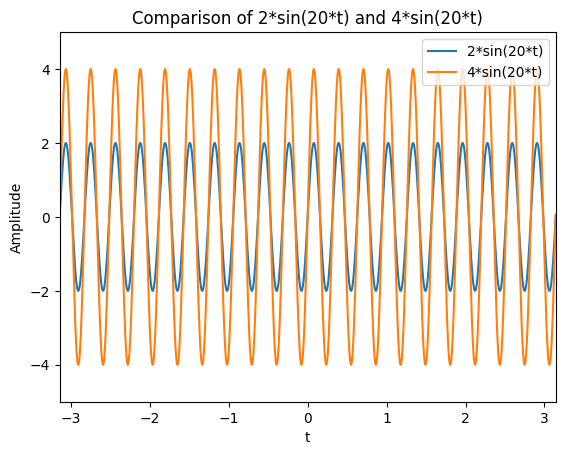

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
y1 = np.loadtxt('data_2sin20t.txt')
y2 = np.loadtxt('data_4sin20t.txt')

# Generate time axis based on number of samples and known range
t = np.linspace(-10 * np.pi, 10 * np.pi, y1.size)

# Plot for comparison
plt.figure()
plt.plot(t, y1, label='2*sin(20*t)')
plt.plot(t, y2, label='4*sin(20*t)')
plt.legend()
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('Comparison of 2*sin(20*t) and 4*sin(20*t)')

zoom_range = np.pi  # +-π around center
plt.xlim(-zoom_range, zoom_range)
plt.ylim(-5, 5)

plt.show()
# 좋은데?

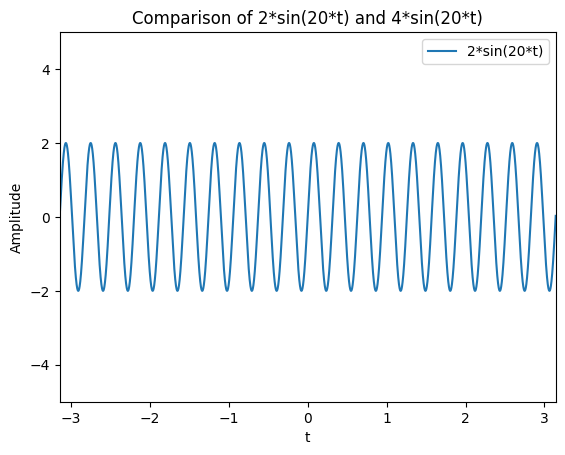

In [ ]:
import math

SIZE = 65536
START = -10 * math.pi
END   =  10 * math.pi
STEP  = (END - START) / (SIZE - 1)

with open("data_2sin20t.txt", "w") as f:
    for i in range(SIZE):
        t = START + i * STEP
        y = 2 * math.sin(20 * t)
        f.write(f"{y}\n")


import numpy as np
import matplotlib.pyplot as plt

# Load datasets
y1 = np.loadtxt('data_2sin20t.txt')

# Generate time axis based on number of samples and known range
t = np.linspace(-10 * np.pi, 10 * np.pi, y1.size)

# Plot for comparison
plt.figure()
plt.plot(t, y1, label='2*sin(20*t)')

plt.legend()
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('Comparison of 2*sin(20*t) and 4*sin(20*t)')

zoom_range = np.pi  # +-π around center
plt.xlim(-zoom_range, zoom_range)
plt.ylim(-5, 5)

plt.show()
# 좋은데?